**Task_2**

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

Відобразимо датасет petrol_consumption.csv, який даний нам для виконання домашнього завдання:

In [35]:
data = pd.read_csv('C:/Users/Vitalii/Downloads/Telegram Desktop/petrol_consumption.csv')
data

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.00,3571,1976,0.525,541
1,9.00,4092,1250,0.572,524
2,9.00,3865,1586,0.580,561
3,7.50,4870,2351,0.529,414
4,8.00,4399,431,0.544,410
5,10.00,5342,1333,0.571,457
6,8.00,5319,11868,0.451,344
7,8.00,5126,2138,0.553,467
8,8.00,4447,8577,0.529,464
9,7.00,4512,8507,0.552,498


In [36]:
data.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


Побудуємо модель множинної регресії:

In [37]:
X = data.drop(columns = 'Petrol_Consumption').values
y = data['Petrol_Consumption'].values

In [38]:
X,y

(array([[9.0000e+00, 3.5710e+03, 1.9760e+03, 5.2500e-01],
        [9.0000e+00, 4.0920e+03, 1.2500e+03, 5.7200e-01],
        [9.0000e+00, 3.8650e+03, 1.5860e+03, 5.8000e-01],
        [7.5000e+00, 4.8700e+03, 2.3510e+03, 5.2900e-01],
        [8.0000e+00, 4.3990e+03, 4.3100e+02, 5.4400e-01],
        [1.0000e+01, 5.3420e+03, 1.3330e+03, 5.7100e-01],
        [8.0000e+00, 5.3190e+03, 1.1868e+04, 4.5100e-01],
        [8.0000e+00, 5.1260e+03, 2.1380e+03, 5.5300e-01],
        [8.0000e+00, 4.4470e+03, 8.5770e+03, 5.2900e-01],
        [7.0000e+00, 4.5120e+03, 8.5070e+03, 5.5200e-01],
        [8.0000e+00, 4.3910e+03, 5.9390e+03, 5.3000e-01],
        [7.5000e+00, 5.1260e+03, 1.4186e+04, 5.2500e-01],
        [7.0000e+00, 4.8170e+03, 6.9300e+03, 5.7400e-01],
        [7.0000e+00, 4.2070e+03, 6.5800e+03, 5.4500e-01],
        [7.0000e+00, 4.3320e+03, 8.1590e+03, 6.0800e-01],
        [7.0000e+00, 4.3180e+03, 1.0340e+04, 5.8600e-01],
        [7.0000e+00, 4.2060e+03, 8.5080e+03, 5.7200e-01],
        [7.000

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [53]:
model = LinearRegression()

In [54]:
model.fit(X_train, y_train)

LinearRegression()

In [55]:
y_pred = model.predict(X_test)

In [56]:
print(f"predicted response:\n{y_pred}")

predicted response:
[620.58093461 467.51687024 739.21337689 645.93715567 591.85595105
 486.34203341 583.80501833 598.93055594 708.77595273 622.27676584
 565.00406531 570.30820315 571.26024921 508.77150871 702.78484107]


In [57]:
print(f"intercept: {model.intercept_}")

intercept: 304.6754038181698


In [58]:
print(f"coefficients: {model.coef_}")

coefficients: [-2.85437070e+01 -7.36087171e-02 -1.65354087e-03  1.43309331e+03]


In [59]:
model.score(X_train, y_train)

0.677908748097597

In [62]:
model.score(X_test, y_test)

0.6483616335976227

Побудуємо графік:

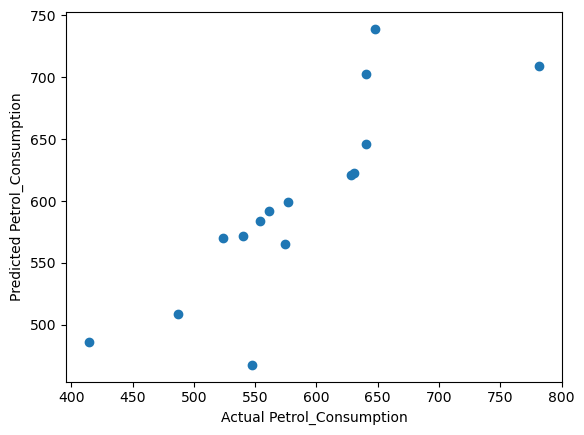

In [64]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Petrol_Consumption')
plt.ylabel('Predicted Petrol_Consumption')
plt.show()

**Оцінка якості множинної регресії:**

In [65]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [66]:
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 39.47
Mean squared error: 2355.92
Root mean squared error: 48.54
